In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
cd '/content/drive/MyDrive/mid_term_nlp/finance'

/content/drive/MyDrive/mid_term_nlp/finance


In [65]:
import numpy as np
import pandas as pd
from utils import *
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [66]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
!python -m spacy download en_core_web_md
# Load the spaCy NLP model
nlp = spacy.load("en_core_web_md")

2024-01-29 06:48:28.168854: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 06:48:28.168939: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 06:48:28.171534: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 06:48:29.489861: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 12.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [68]:
df = pd.read_csv('data.csv')
df = df[['Sentence','Sentiment']].dropna()

In [104]:
df.head()

,Sentence,Sentiment
4994,result expect late 2006,2
37,item includ restructur cost eur1 6 year earlie...,1
1672,votorantim celulos e papel vcp part votorantim...,2
2991,2008 gener net sale eur 9 3 million usd 13 1,2
4732,financi detail avail,2


In [69]:
df['Sentiment'].replace({'positive':1,'negative':0, 'neutral':2},inplace=True)

In [70]:
df = shuffle(df)
# df = df[:10000]

In [71]:
df['Sentence'] = df['Sentence'].apply(clean_html)
df['Sentence'] = df['Sentence'].apply(convert_lower)
df['Sentence'] = df['Sentence'].apply(remove_special)
df['Sentence'] = df['Sentence'].apply(remove_stopwords)
df['Sentence'] = df['Sentence'].apply(stem_words)
df['Sentence'] = df['Sentence'].apply(join_back)

In [72]:
cv=CountVectorizer()
X = cv.fit_transform(df['Sentence']).toarray()

In [73]:
y=df.iloc[:,-1].values

In [74]:
# Convert the ps_utterance into numpy arrays
X = np.array(X)
# Create the category list (catlist)
y = np.array(y)

In [75]:
y = y.reshape(y.shape[0] , 1)

In [76]:
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (5842, 8819)
y shape: (5842, 1)


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

Naive Bayes

In [78]:
clf1=MultinomialNB()

In [79]:
clf1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [80]:
y_pred1=clf1.predict(X_test)

In [81]:
accuracy = accuracy_score(y_test, y_pred1)
print(f"NB accuracy:{accuracy * 100:.3f}%")
recall = recall_score(y_test, y_pred1, average='macro')
print(f"NB recall:{recall * 100:.3f}%")
f1 = f1_score(y_test, y_pred1, average='macro')
print(f"NB F1:{f1 * 100:.3f}%")

NB accuracy:66.895%
NB recall:59.444%
NB F1:59.320%


In [82]:
label = ['Negativel', 'Positive', 'Neutral']

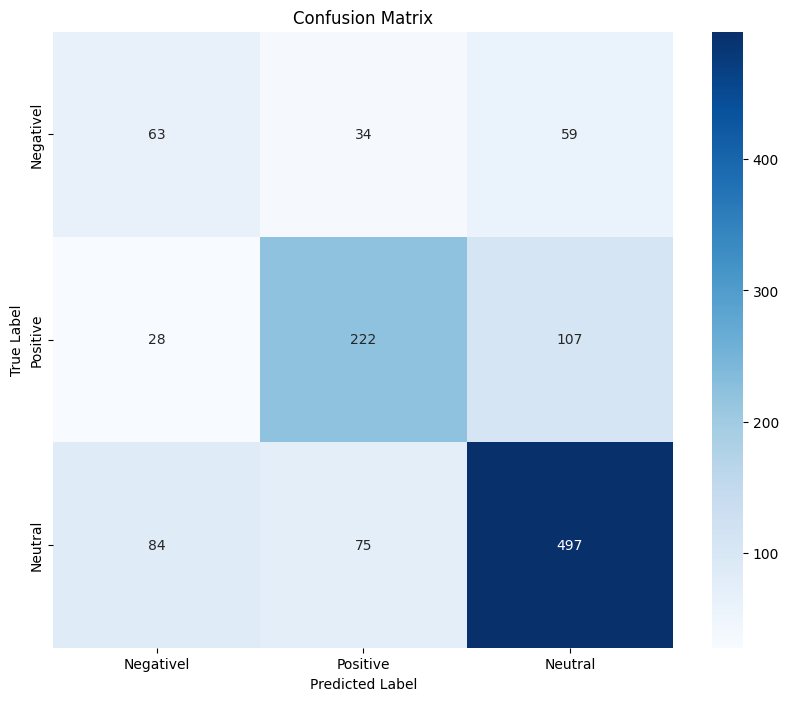

In [83]:
cm = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

XGBoost

In [84]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [85]:
y_pred2 = xgb_model.predict(X_test)

In [86]:
accuracy = accuracy_score(y_test, y_pred2)
print(f"XGBoost accuracy:{accuracy * 100:.3f}%")
recall = recall_score(y_test, y_pred2, average='macro')
print(f"XGBoost recall:{recall * 100:.3f}%")
f1 = f1_score(y_test, y_pred2, average='macro')
print(f"XGBoost F1:{f1 * 100:.3f}%")

XGBoost accuracy:69.803%
XGBoost recall:56.484%
XGBoost F1:57.948%


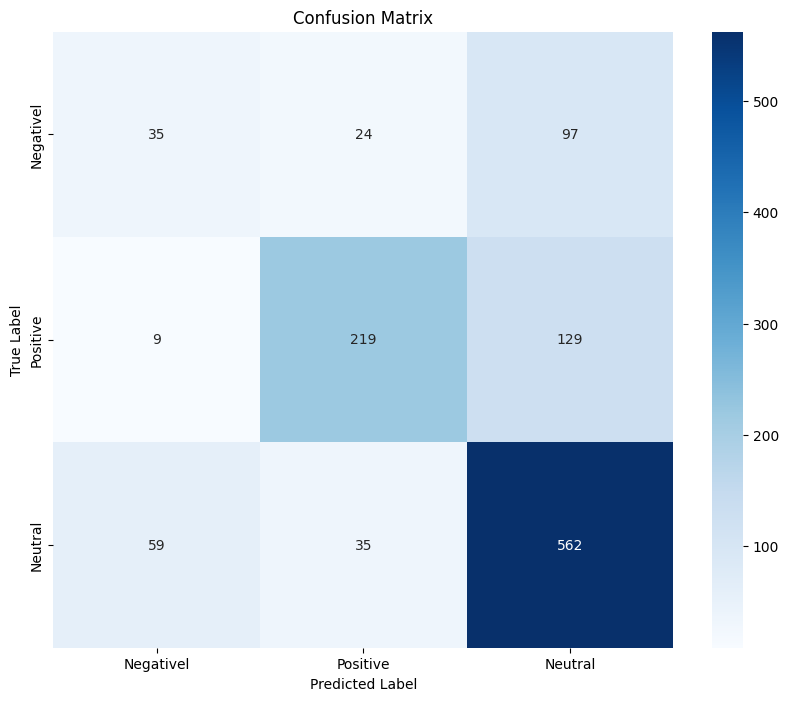

In [87]:
cm = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Random Forest

In [88]:
clf3 = RandomForestClassifier(max_depth=19, random_state=42)
clf3.fit(X_train, y_train)

<ipython-input-88-5864836e02d0>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf3.fit(X_train, y_train)


RandomForestClassifier(max_depth=19, random_state=42)

In [89]:
y_pred3 = clf3.predict(X_test)

In [90]:
accuracy = accuracy_score(y_test, y_pred3)
print(f"RF accuracy:{accuracy * 100:.3f}%")
recall = recall_score(y_test, y_pred3, average='macro')
print(f"RF recall:{recall * 100:.3f}%")
f1 = f1_score(y_test, y_pred3, average='macro')
print(f"RF F1:{f1 * 100:.3f}%")

RF accuracy:62.190%
RF recall:40.373%
RF F1:36.812%


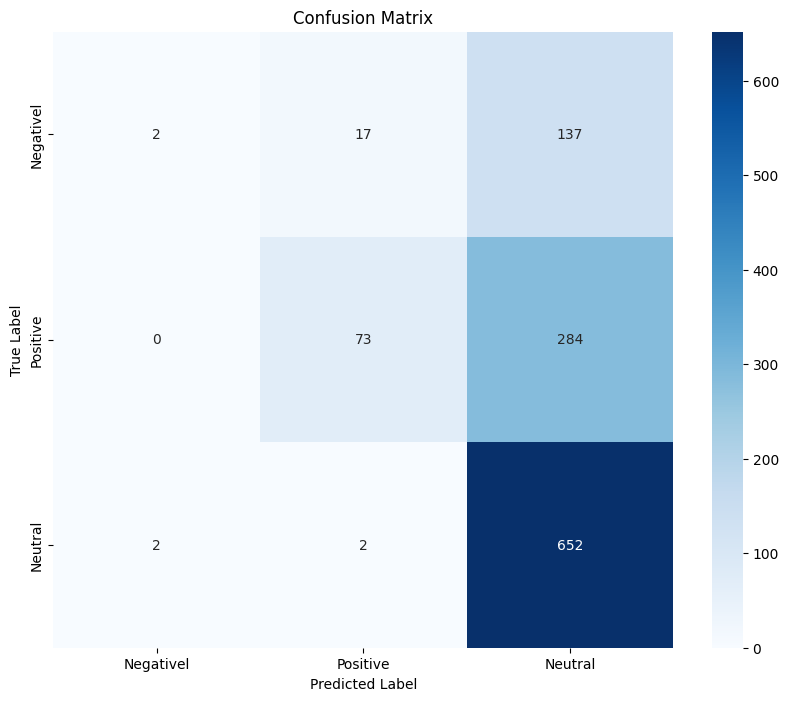

In [91]:
cm = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()